# Regularized Linear Regression Study - EDA + Model Training

#### Import Packages and Data


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Import Data

total_data = pd.read_csv('/workspaces/gustavolima-regularized-Lr/data/raw/demographic_health_data.csv')
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [56]:
total_data.shape

(3140, 108)

In [57]:
# Trimm the Categoric (String) 
total_data.drop(['COUNTY_NAME', 'STATE_NAME'], axis=1, inplace=True)


##### Normalize Data

In [58]:
# Normalize the Data
from sklearn.preprocessing import StandardScaler

num_variables = [col for col in total_data.columns if col != 'Heart disease_prevalence']

# Scale Train Data
scaler = StandardScaler()
norm_features = scaler.fit_transform(total_data[num_variables])
total_data_norm = pd.DataFrame(norm_features, index = total_data.index, columns = num_variables)
total_data_norm['Heart disease_prevalence'] = total_data['Heart disease_prevalence']
total_data_norm.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,Heart disease_prevalence
0,-1.940874,-0.145679,-0.142421,0.158006,-0.135556,0.573496,-0.153144,0.027610,-0.139384,0.588469,...,-0.063696,-0.071720,-0.089834,-0.129902,-0.609615,-0.582796,-0.669652,-0.147523,-1.082865,7.9
1,-1.940742,0.341296,0.287476,-0.242861,0.320383,-0.193107,0.183774,-0.469965,0.230620,-0.110300,...,-0.394103,-0.414900,-0.337677,0.376251,-0.433549,-0.393279,-0.343373,0.389791,-0.420704,7.8
2,-1.940610,-0.237785,-0.239429,-0.419441,-0.246181,-0.439718,-0.225971,0.272104,-0.218759,0.656538,...,2.432709,2.483064,2.317776,-0.183415,1.855312,1.880929,1.777443,-0.204321,0.903618,11.0
3,-1.940478,-0.245223,-0.246032,-0.426966,-0.254791,-0.609076,-0.230792,0.396168,-0.220555,1.264959,...,0.376846,0.423984,0.299632,-0.229096,-0.257483,-0.203761,-0.180233,-0.242100,-1.745026,8.6
4,-1.940346,-0.138966,-0.135053,0.186249,-0.137140,0.216679,-0.155888,-0.200808,-0.143570,0.088582,...,0.156575,0.195197,0.158008,-0.111247,-0.081417,-0.014244,-0.017093,-0.124105,-1.745026,9.2


In [59]:
# Split DataSet into Train / Test
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples.
X = total_data_norm.drop('Heart disease_prevalence', axis = 1)
y = total_data_norm['Heart disease_prevalence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
train_ids = X_train.index.values
test_ids = X_test.index.values

# Let Algo Select Best 36 Features
selection_model = SelectKBest(f_regression, k = 36)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,30-39 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop,R_death_2018,R_NATURAL_INC_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,...,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,Urban_rural_code
0,-0.663894,0.519502,0.379332,-0.128169,-0.135940,0.122723,0.108842,0.154941,-0.293986,0.055545,...,0.940367,0.845366,0.980076,0.229998,0.195197,0.299632,0.622848,0.554308,0.635465,0.903618
1,-0.786006,1.165547,0.435977,0.636954,1.017714,-1.036036,-0.506607,1.962510,-0.421202,-0.026009,...,0.343248,0.222683,0.406134,0.009727,-0.071720,0.051790,0.094650,-0.014244,0.146046,0.241457
2,-0.119547,-0.659746,-0.550061,-0.392157,-0.433657,0.172031,-0.411923,1.322909,-0.580221,-0.482712,...,0.044689,0.031088,-0.014757,-0.320679,-0.338638,-0.337677,-0.961748,-0.961830,-0.995931,-1.745026
3,0.350862,-0.572979,-0.486041,-0.620744,-0.470872,0.147377,-0.869564,-0.206573,0.289084,-0.874172,...,-0.424476,-0.352101,-0.435648,-0.687797,-0.643687,-0.727143,-0.785681,-0.772313,-0.832792,-1.082865
4,0.082720,-0.240616,-0.410327,-0.158592,-0.024296,0.221340,-0.711757,0.293985,-0.039556,0.349140,...,0.215294,0.270582,0.214820,-0.210544,-0.147983,-0.231458,-0.081417,-0.014244,-0.180233,-0.420704


In [60]:
# Combine and save  the Datasets

# Concatenate the two dataframes
X_train_sel['Heart disease_prevalence'] = y_train
X_test_sel['Heart disease_prevalence'] = y_test

data_combo = pd.concat([X_train_sel, X_test_sel], axis=0)

data_combo.to_csv('/workspaces/gustavolima-regularized-Lr/data/raw/total_data_health.csv', index=False)
data_combo.head()

,30-39 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop,R_death_2018,R_NATURAL_INC_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,...,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,Urban_rural_code,Heart disease_prevalence
0,-0.663894,0.519502,0.379332,-0.128169,-0.135940,0.122723,0.108842,0.154941,-0.293986,0.055545,...,0.845366,0.980076,0.229998,0.195197,0.299632,0.622848,0.554308,0.635465,0.903618,NaN
1,-0.786006,1.165547,0.435977,0.636954,1.017714,-1.036036,-0.506607,1.962510,-0.421202,-0.026009,...,0.222683,0.406134,0.009727,-0.071720,0.051790,0.094650,-0.014244,0.146046,0.241457,7.8
2,-0.119547,-0.659746,-0.550061,-0.392157,-0.433657,0.172031,-0.411923,1.322909,-0.580221,-0.482712,...,0.031088,-0.014757,-0.320679,-0.338638,-0.337677,-0.961748,-0.961830,-0.995931,-1.745026,11.0
3,0.350862,-0.572979,-0.486041,-0.620744,-0.470872,0.147377,-0.869564,-0.206573,0.289084,-0.874172,...,-0.352101,-0.435648,-0.687797,-0.643687,-0.727143,-0.785681,-0.772313,-0.832792,-1.082865,8.6
4,0.082720,-0.240616,-0.410327,-0.158592,-0.024296,0.221340,-0.711757,0.293985,-0.039556,0.349140,...,0.270582,0.214820,-0.210544,-0.147983,-0.231458,-0.081417,-0.014244,-0.180233,-0.420704,9.2


### Exploratory Data Analysis (With Treated Data)

#### DataSet Analysis

In [53]:
# Dataset Shape
data_combo.shape

(3140, 37)

In [54]:
# Dataset Columns Info

data_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3140 entries, 0 to 627
Data columns (total 37 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   30-39 y/o % of total pop                                        3140 non-null   float64
 1   60-69 y/o % of total pop                                        3140 non-null   float64
 2   70-79 y/o % of total pop                                        3140 non-null   float64
 3   80+ y/o % of total pop                                          3140 non-null   float64
 4   R_death_2018                                                    3140 non-null   float64
 5   R_NATURAL_INC_2018                                              3140 non-null   float64
 6   Percent of adults with less than a high school diploma 2014-18  3140 non-null   float64
 7   Percent of adults with a high school diploma only 20

##### Dataset Initial Trim

In [48]:
# Remove Duplicates

if data_combo.duplicated().sum() > 0 :
    data_combo.drop_duplicates()

#### Multivariate Data Analysis

##### Numerical Data Analysis

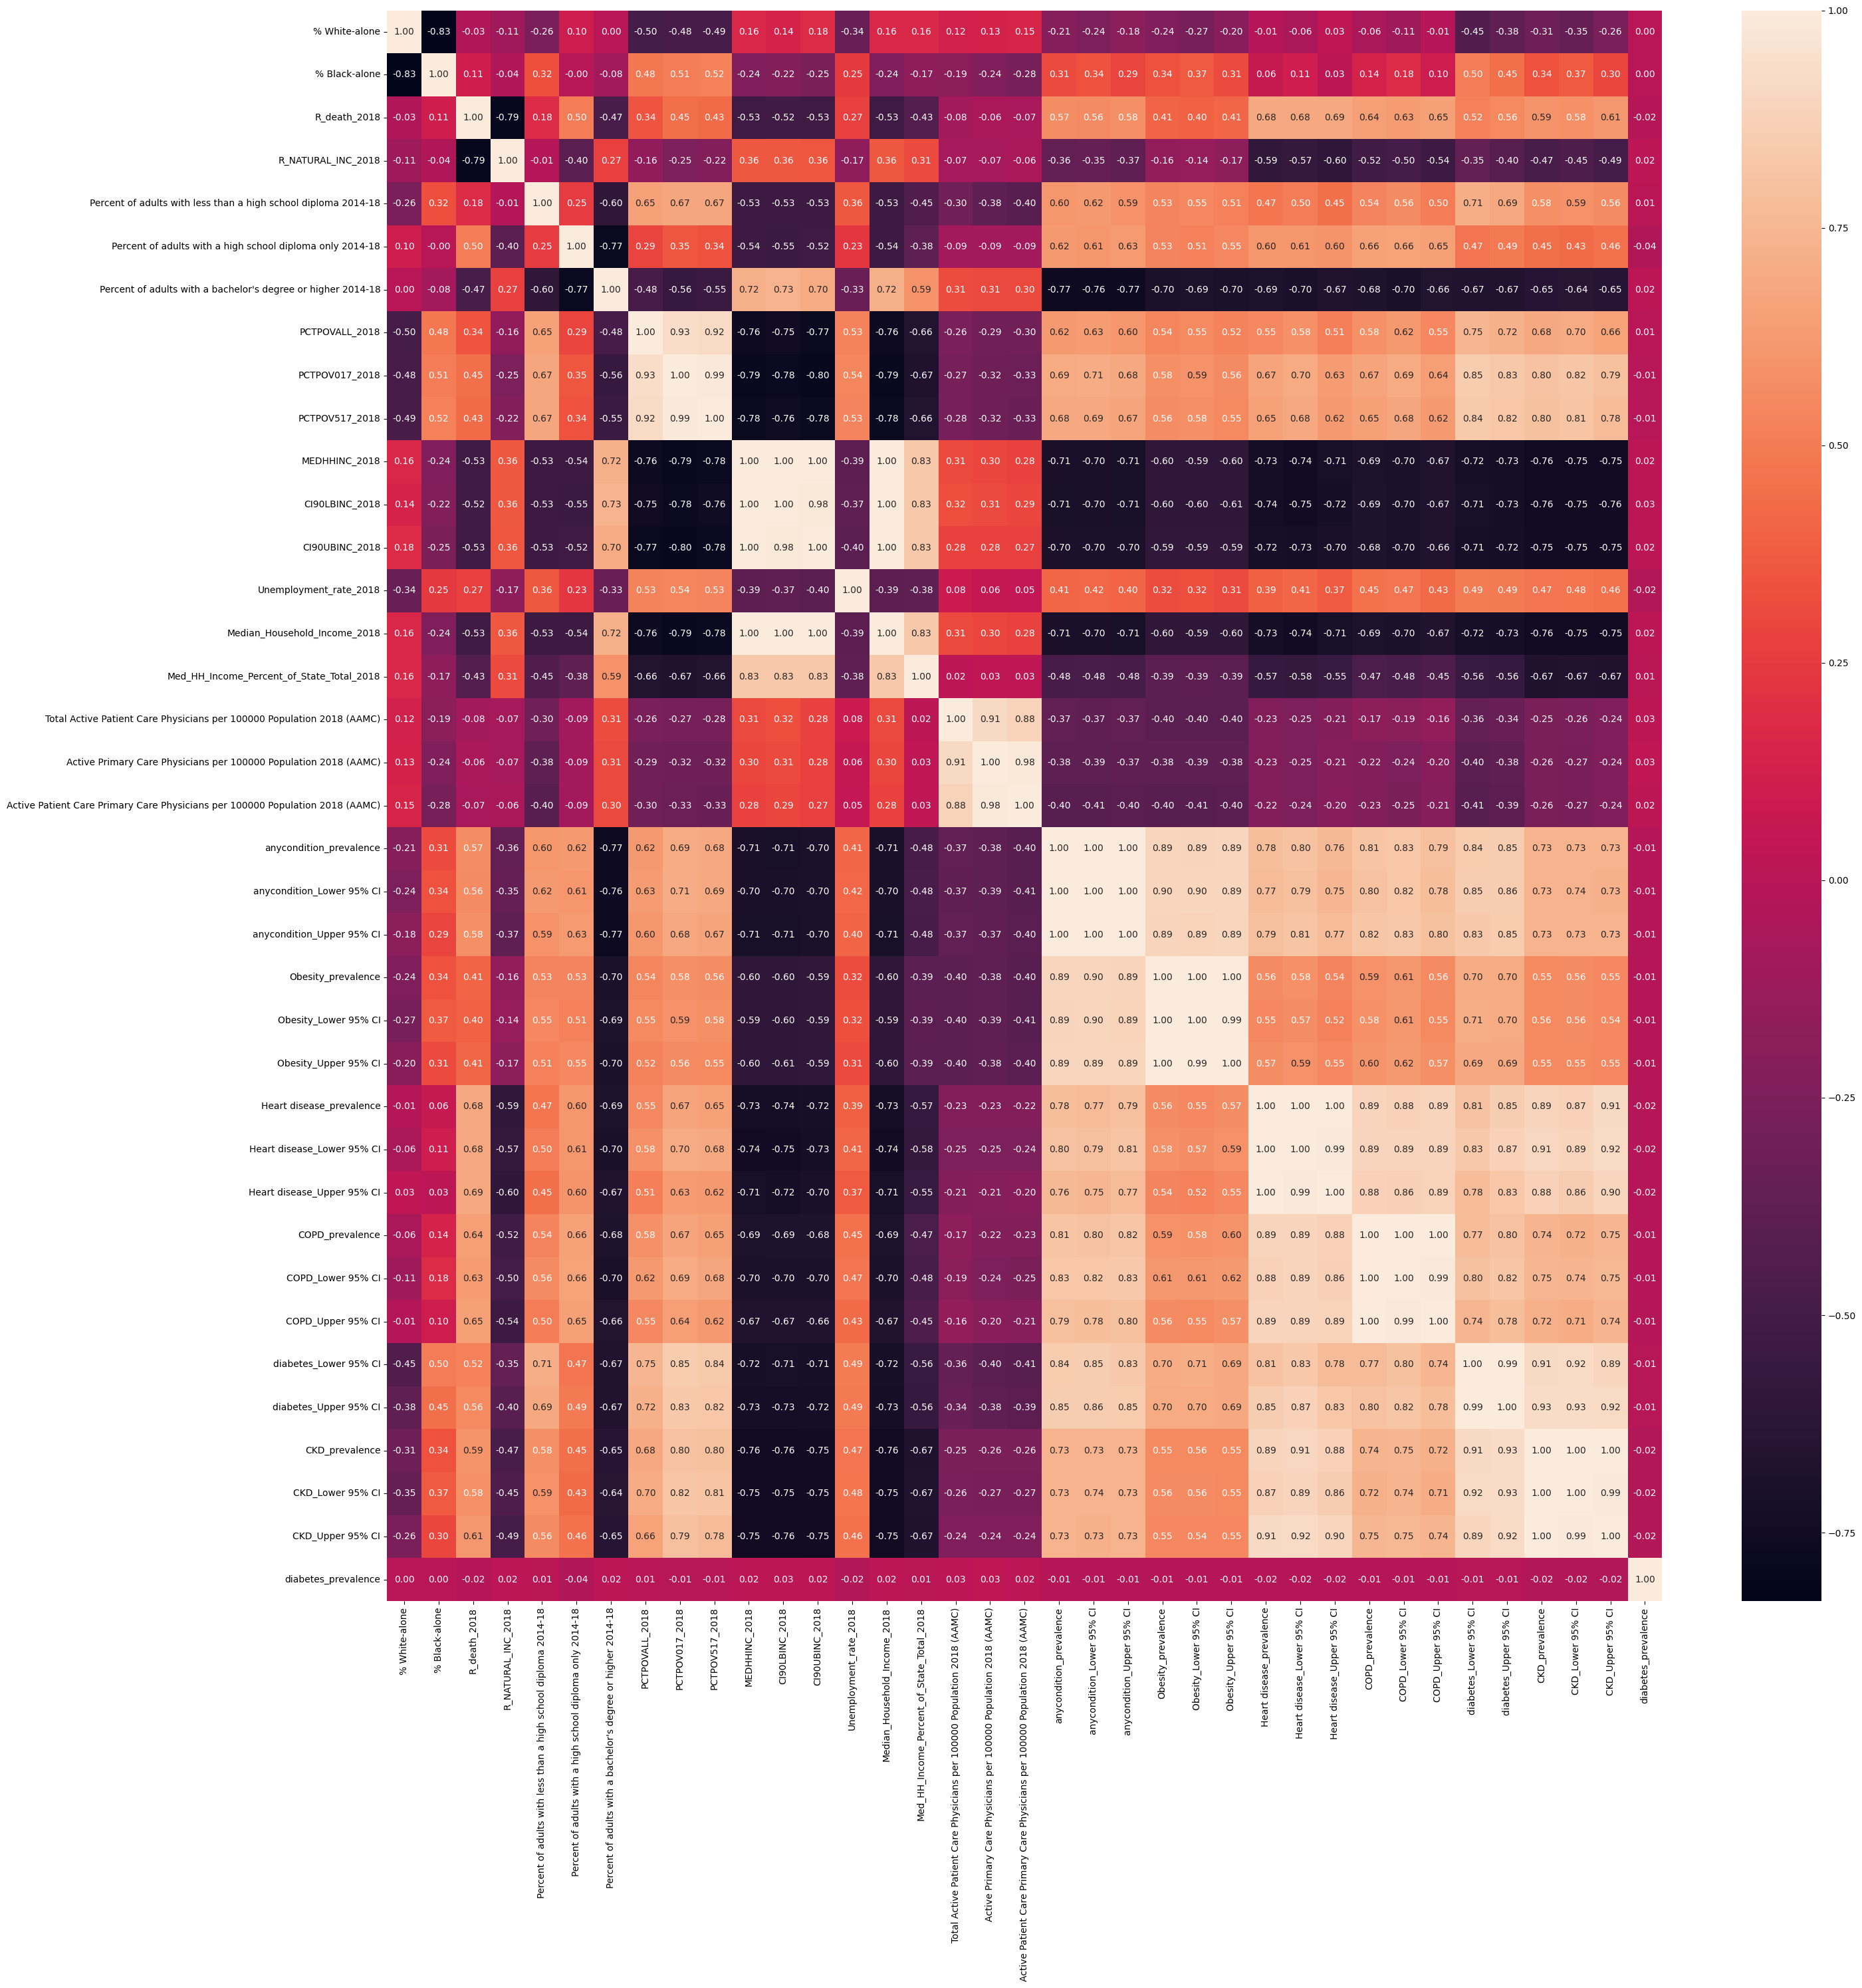

In [49]:
# Categorical Univariate Date Analysis

corr_matrix = data_combo.corr()

# Draw Canvas
fig, axis = plt.subplots(figsize=(30,30))

# Plot the Data
sns.heatmap(corr_matrix, annot=True, fmt='.2f')

# Adjust Layout
plt.tight_layout()

# Plot
plt.show()

In [50]:
# Drop Null Data

data_combo.isnull().sum().sort_values(ascending=False)

diabetes_prevalence                                                              983
% Black-alone                                                                      0
R_death_2018                                                                       0
R_NATURAL_INC_2018                                                                 0
% White-alone                                                                      0
Percent of adults with less than a high school diploma 2014-18                     0
Percent of adults with a high school diploma only 2014-18                          0
PCTPOVALL_2018                                                                     0
Percent of adults with a bachelor's degree or higher 2014-18                       0
PCTPOV517_2018                                                                     0
MEDHHINC_2018                                                                      0
CI90LBINC_2018                                                   